<a href="https://colab.research.google.com/github/Therealchyke/Energy-Prediction/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [13]:
df=pd.read_csv('/content/AEP_hourly.csv',parse_dates=[0])

In [14]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  121273 non-null  datetime64[ns]
 1   AEP_MW    121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


In [16]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [17]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [18]:
df['Date']=pd.to_datetime(df['Datetime']).dt.date
df['Time']=pd.to_datetime(df['Datetime']).dt.time

In [19]:
df.head()

,Datetime,AEP_MW,Date,Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00


# **Question 1**: The highest and lowest energy consumption were recorded in what year?

In [20]:
df.loc[df['AEP_MW'].idxmax()]

Datetime    2008-10-20 14:00:00
AEP_MW                    25695
Date                 2008-10-20
Time                   14:00:00
Name: 30221, dtype: object

In [21]:
df.loc[df['AEP_MW'].idxmin()]

Datetime    2016-10-02 05:00:00
AEP_MW                     9581
Date                 2016-10-02
Time                   05:00:00
Name: 100759, dtype: object

## **Question 2**: Return the highest and lowest energy consumption for each year

In [22]:
df['Year']=pd.to_datetime(df['Date']).dt.year

In [23]:
df.head

<bound method NDFrame.head of                   Datetime   AEP_MW        Date      Time  Year
0      2004-12-31 01:00:00  13478.0  2004-12-31  01:00:00  2004
1      2004-12-31 02:00:00  12865.0  2004-12-31  02:00:00  2004
2      2004-12-31 03:00:00  12577.0  2004-12-31  03:00:00  2004
3      2004-12-31 04:00:00  12517.0  2004-12-31  04:00:00  2004
4      2004-12-31 05:00:00  12670.0  2004-12-31  05:00:00  2004
...                    ...      ...         ...       ...   ...
121268 2018-01-01 20:00:00  21089.0  2018-01-01  20:00:00  2018
121269 2018-01-01 21:00:00  20999.0  2018-01-01  21:00:00  2018
121270 2018-01-01 22:00:00  20820.0  2018-01-01  22:00:00  2018
121271 2018-01-01 23:00:00  20415.0  2018-01-01  23:00:00  2018
121272 2018-01-02 00:00:00  19993.0  2018-01-02  00:00:00  2018

[121273 rows x 5 columns]>

In [24]:
df.groupby('Year')['AEP_MW'].max()

Year
2004    22577.0
2005    24015.0
2006    24842.0
2007    25164.0
2008    25695.0
2009    24703.0
2010    23736.0
2011    24597.0
2012    23320.0
2013    22858.0
2014    24421.0
2015    24739.0
2016    22488.0
2017    21678.0
2018    22759.0
Name: AEP_MW, dtype: float64

In [25]:
df.groupby('Year')['AEP_MW'].min()

Year
2004    10263.0
2005     9823.0
2006    10176.0
2007    10858.0
2008    11021.0
2009     9701.0
2010    10070.0
2011    10479.0
2012     9669.0
2013     9801.0
2014     9707.0
2015     9662.0
2016     9581.0
2017     9698.0
2018     9815.0
Name: AEP_MW, dtype: float64

## Making a few visualizations to understand the data more

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Distribution of Energy Consumption')

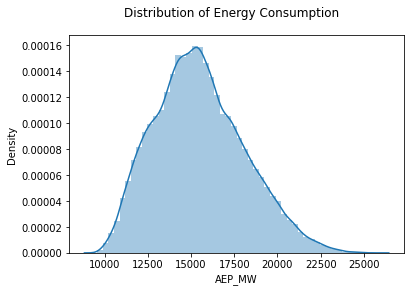

In [26]:
sns.distplot(df['AEP_MW'])
plt.suptitle('Distribution of Energy Consumption')

## The trend in energy over the years

Text(0.5, 0.98, 'Trend of Energy Consumption over the Years')

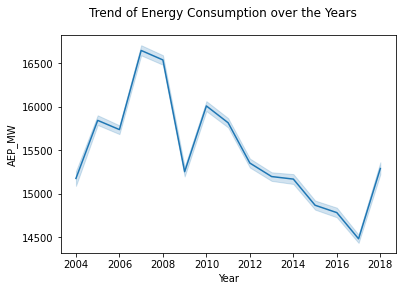

In [27]:
sns.lineplot(x=df['Year'],y=df['AEP_MW'])
plt.suptitle('Trend of Energy Consumption over the Years')

In [28]:
df.head()

,Datetime,AEP_MW,Date,Time,Year
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,2004
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,2004
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00,2004


In [29]:
df['Hour']=df['Time'].apply(lambda x:x.hour)

In [30]:
df['Month']=df['Datetime'].apply(lambda x:x.month)

Text(0.5, 0.98, 'Energy Consumption by Month')

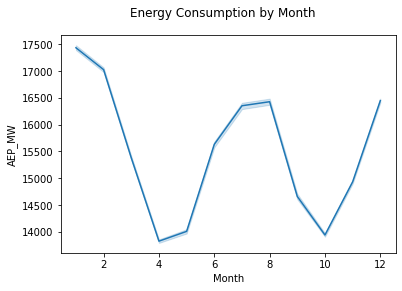

In [31]:
sns.lineplot(x=df['Month'],y=df['AEP_MW'])
plt.suptitle('Energy Consumption by Month')

In [32]:
df.head()

,Datetime,AEP_MW,Date,Time,Year,Hour,Month
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004,1,12
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004,2,12
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,2004,3,12
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,2004,4,12
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00,2004,5,12


## Relationship between Time and Energy

Text(0.5, 0.98, 'Relationship between Time and Energy Consumption')

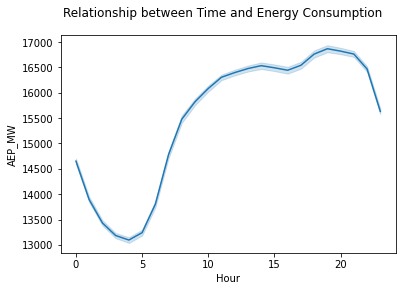

In [33]:
sns.lineplot(x=df['Hour'],y=df['AEP_MW'])
plt.suptitle('Relationship between Time and Energy Consumption')

Energy usage is at it's lowest around 4:30am - 5am and at it's highest around 20:00pm - 22:00pm before it starts dropping

Text(0.5, 0.98, 'Energy Consumption Against Time from 2004 to 2018')

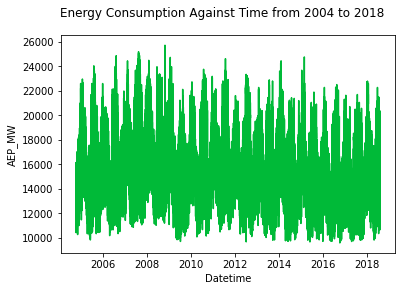

In [34]:
sns.lineplot(x=df['Datetime'],y=df['AEP_MW'],color="#00BA38")
plt.suptitle('Energy Consumption Against Time from 2004 to 2018')

Data looks stationary 

In [35]:
df.columns

Index(['Datetime', 'AEP_MW', 'Date', 'Time', 'Year', 'Hour', 'Month'], dtype='object')

In [36]:
def features(df,label):
  '''Function to create Features for predicting'''
  df['Date']=df['Datetime']
  df['Year']=df['Datetime'].dt.year
  df['Hour']=df['Datetime'].dt.hour
  df['DayofWeek']=df['Datetime'].dt.dayofweek
  df['Quarter']=df['Datetime'].dt.quarter
  df['Month']=df['Datetime'].dt.month
  df['DayofYear']=df['Datetime'].dt.dayofyear
  df['DayofMonth']=df['Datetime'].dt.day 
  df['WeekofYear']=df['Datetime'].dt.weekofyear 

  X=df[['Date','Hour','Year','DayofWeek','Quarter','Month','DayofYear','DayofMonth','WeekofYear']]

  if label:
    y=df[label]
    return X,y

  return X


In [37]:
X,y=features(df,label='AEP_MW')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


In [38]:
feat_and_target=pd.concat([X,y],axis=1)

In [39]:
feat_and_target.head()

,Date,Hour,Year,DayofWeek,Quarter,Month,DayofYear,DayofMonth,WeekofYear,AEP_MW
0,2004-12-31 01:00:00,1,2004,4,4,12,366,31,53,13478.0
1,2004-12-31 02:00:00,2,2004,4,4,12,366,31,53,12865.0
2,2004-12-31 03:00:00,3,2004,4,4,12,366,31,53,12577.0
3,2004-12-31 04:00:00,4,2004,4,4,12,366,31,53,12517.0
4,2004-12-31 05:00:00,5,2004,4,4,12,366,31,53,12670.0


Text(0.5, 0.98, 'Energy consumption in MW by Hour, Day of Week, Year and Week of Year')

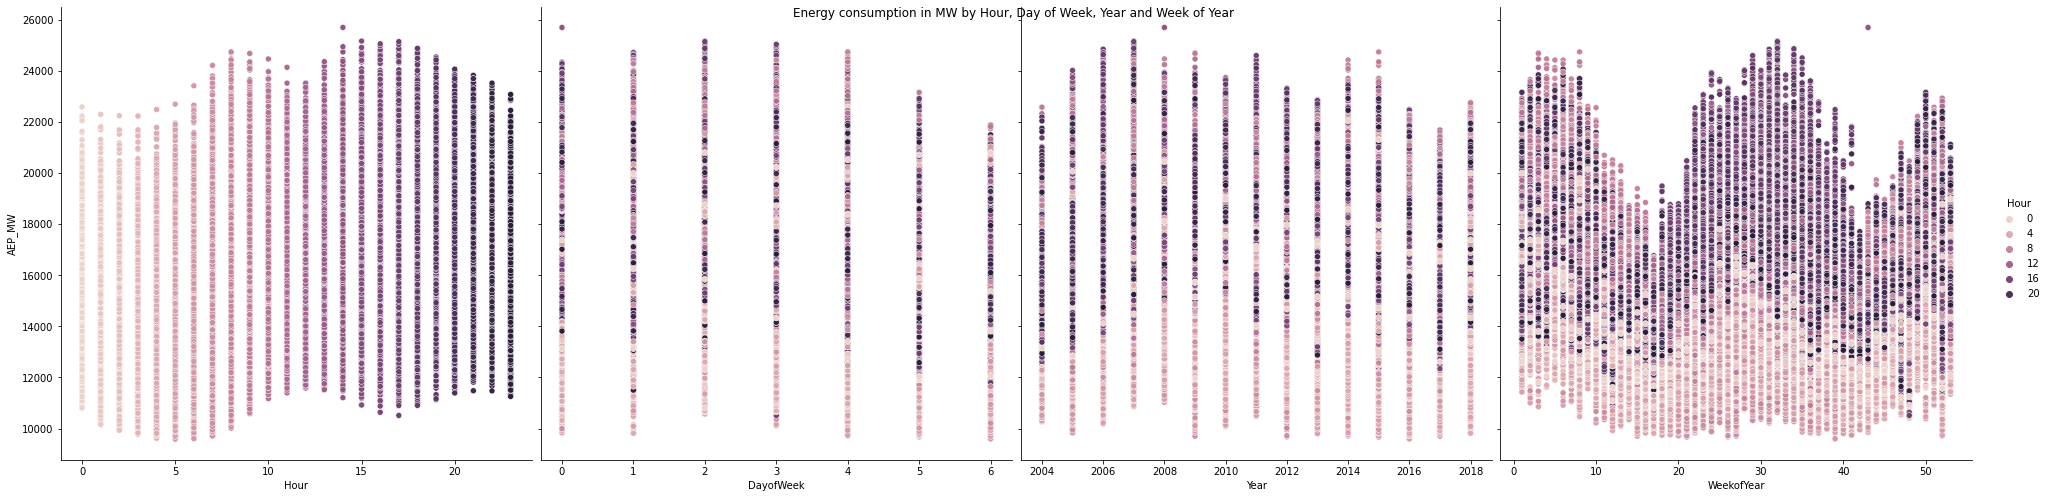

In [40]:
sns.pairplot(feat_and_target.dropna(),hue='Hour',x_vars=['Hour','DayofWeek','Year','WeekofYear'],y_vars='AEP_MW',height=7)
plt.suptitle('Energy consumption in MW by Hour, Day of Week, Year and Week of Year')

In [41]:
feat_and_target.head()

,Date,Hour,Year,DayofWeek,Quarter,Month,DayofYear,DayofMonth,WeekofYear,AEP_MW
0,2004-12-31 01:00:00,1,2004,4,4,12,366,31,53,13478.0
1,2004-12-31 02:00:00,2,2004,4,4,12,366,31,53,12865.0
2,2004-12-31 03:00:00,3,2004,4,4,12,366,31,53,12577.0
3,2004-12-31 04:00:00,4,2004,4,4,12,366,31,53,12517.0
4,2004-12-31 05:00:00,5,2004,4,4,12,366,31,53,12670.0


**Splitting the data into Train and Test sets**

In [42]:
split_date='01-Jan-2014'
train=feat_and_target.loc[feat_and_target['Date']<=split_date].copy()
test=feat_and_target.loc[feat_and_target['Date']>split_date].copy()

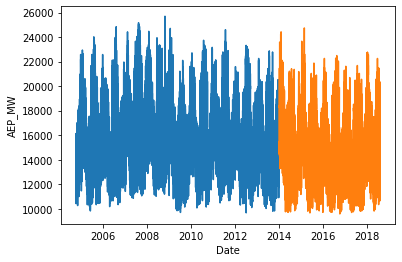

In [43]:
sns.lineplot(x=train['Date'],y=train['AEP_MW'])
sns.lineplot(x=test['Date'],y=test['AEP_MW'])

In [44]:
from fbprophet import Prophet

In [45]:
train_prophet=train.reset_index().rename(columns={'Date':'ds','AEP_MW':'y'})

In [46]:
train_prophet.head()

,index,ds,Hour,Year,DayofWeek,Quarter,Month,DayofYear,DayofMonth,WeekofYear,y
0,0,2004-12-31 01:00:00,1,2004,4,4,12,366,31,53,13478.0
1,1,2004-12-31 02:00:00,2,2004,4,4,12,366,31,53,12865.0
2,2,2004-12-31 03:00:00,3,2004,4,4,12,366,31,53,12577.0
3,3,2004-12-31 04:00:00,4,2004,4,4,12,366,31,53,12517.0
4,4,2004-12-31 05:00:00,5,2004,4,4,12,366,31,53,12670.0


In [47]:
model=Prophet()
model.fit(train_prophet)

In [48]:
test_prophet=test.reset_index().rename(columns={'Date':'ds','AEP_MW':'y'})

In [49]:
forecast=model.predict(test_prophet)

In [50]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01 01:00:00,15110.692198,12450.515361,16525.281297,15110.692198,15110.692198,-583.181616,-583.181616,-583.181616,-1535.455525,-1535.455525,-1535.455525,501.139485,501.139485,501.139485,451.134424,451.134424,451.134424,0.0,0.0,0.0,14527.510582
1,2014-01-01 02:00:00,15110.674359,12085.783772,15750.369558,15110.674359,15110.674359,-1189.564918,-1189.564918,-1189.564918,-2140.982288,-2140.982288,-2140.982288,499.339620,499.339620,499.339620,452.077750,452.077750,452.077750,0.0,0.0,0.0,13921.109441
2,2014-01-01 03:00:00,15110.656520,11572.197969,15437.863488,15110.656520,15110.656520,-1537.784797,-1537.784797,-1537.784797,-2489.531307,-2489.531307,-2489.531307,498.697512,498.697512,498.697512,453.048999,453.048999,453.048999,0.0,0.0,0.0,13572.871723
3,2014-01-01 04:00:00,15110.638681,11630.005420,15345.796998,15110.638681,15110.638681,-1578.171145,-1578.171145,-1578.171145,-2531.386341,-2531.386341,-2531.386341,499.167040,499.167040,499.167040,454.048156,454.048156,454.048156,0.0,0.0,0.0,13532.467536
4,2014-01-01 05:00:00,15110.620842,11986.727802,15706.018769,15110.620842,15110.620842,-1278.997756,-1278.997756,-1278.997756,-2234.759853,-2234.759853,-2234.759853,500.686893,500.686893,500.686893,455.075205,455.075205,455.075205,0.0,0.0,0.0,13831.623086


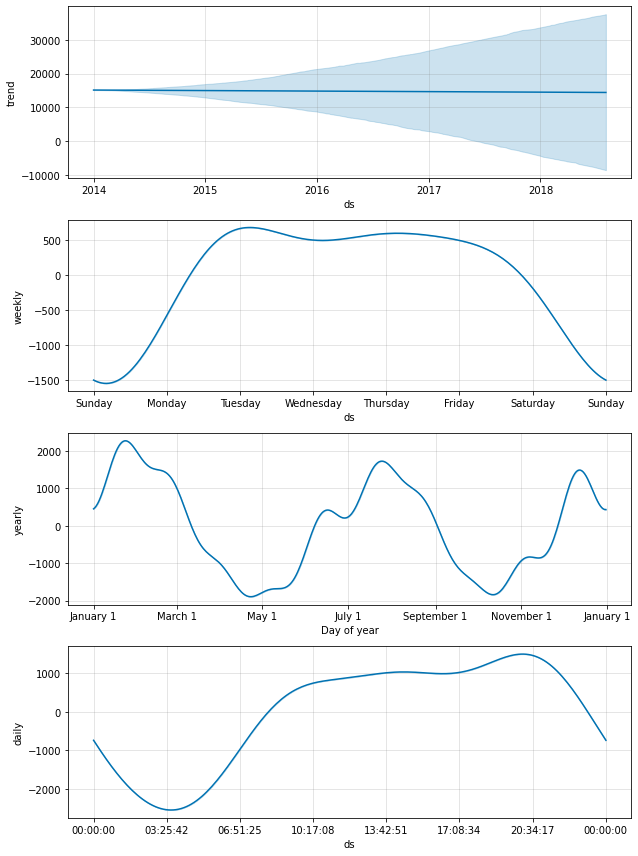

In [51]:
fig=model.plot_components(forecast)

In [53]:
test.head()

,Date,Hour,Year,DayofWeek,Quarter,Month,DayofYear,DayofMonth,WeekofYear,AEP_MW
81075,2014-12-31 01:00:00,1,2014,2,4,12,365,31,1,15993.0
81076,2014-12-31 02:00:00,2,2014,2,4,12,365,31,1,15780.0
81077,2014-12-31 03:00:00,3,2014,2,4,12,365,31,1,15769.0
81078,2014-12-31 04:00:00,4,2014,2,4,12,365,31,1,15738.0
81079,2014-12-31 05:00:00,5,2014,2,4,12,365,31,1,15993.0


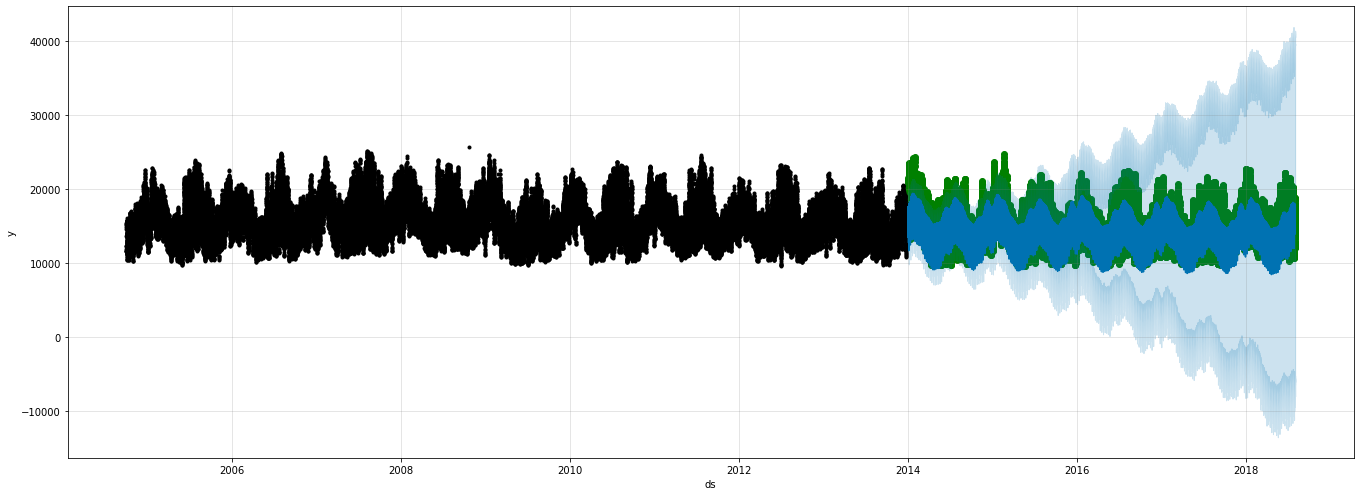

In [55]:
f, ax = plt.subplots(1)
f.set_figheight(7)
f.set_figwidth(19)
ax.scatter(test['Date'], test['AEP_MW'], color='g')
fig = model.plot(forecast, ax=ax)

The dark coloured section of the data indicates past data

The Green coloured section of the data indicates future data

The dark blue coloured section indicates the prediction 

The light ble coloured section indicates uncertainty

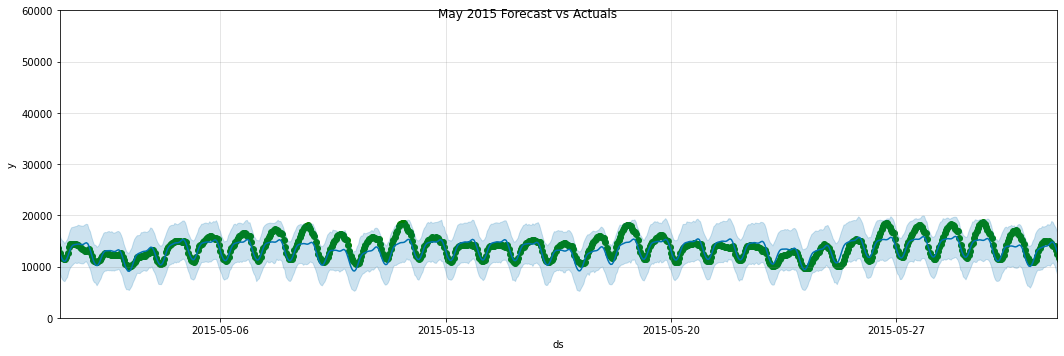

In [60]:
from datetime import datetime
datetime_object = datetime.strptime('May 1 2005  1:33PM', '%b %d %Y %I:%M%p')

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test['Date'], test['AEP_MW'], color='g')
fig = model.plot(forecast, ax=ax)
ax.set_xbound(lower=datetime.strptime('05-01-2015', "%m-%d-%Y"),
              upper=datetime.strptime('06-01-2015', "%m-%d-%Y"))
ax.set_ylim(0, 60000)
plot = plt.suptitle('May 2015 Forecast vs Actuals')

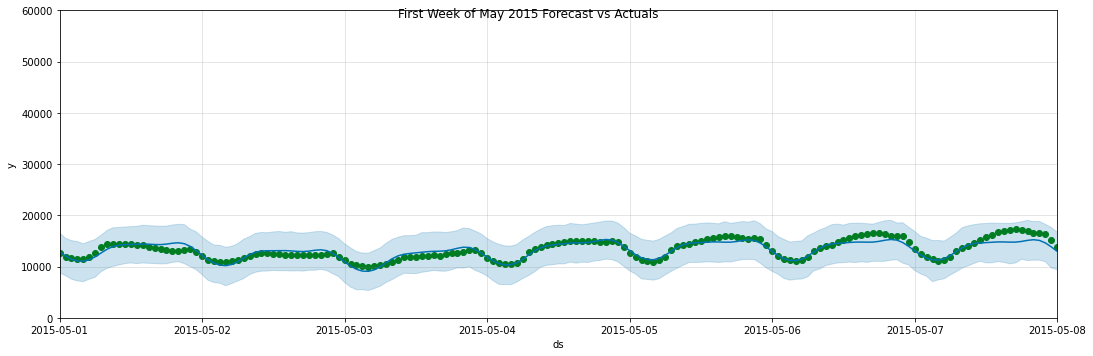

In [62]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test['Date'], test['AEP_MW'], color='g')
fig = model.plot(forecast, ax=ax)
ax.set_xbound(lower=datetime.strptime('05-01-2015', "%m-%d-%Y"),
              upper=datetime.strptime('05-08-2015', "%m-%d-%Y"))
ax.set_ylim(0, 60000)
plot = plt.suptitle('First Week of May 2015 Forecast vs Actuals')

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
mse=mean_squared_error(y_true=test['AEP_MW'],y_pred=forecast['yhat'])
print(f'The Mean squared error is {mse}')

The Mean squared error is 6712445.315100956


In [68]:
mae=mean_absolute_error(y_true=test['AEP_MW'],y_pred=forecast['yhat'])
print(f'The Mean absolute error is {mae}')

The Mean absolute error is 2067.0178291620277
